In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [5]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


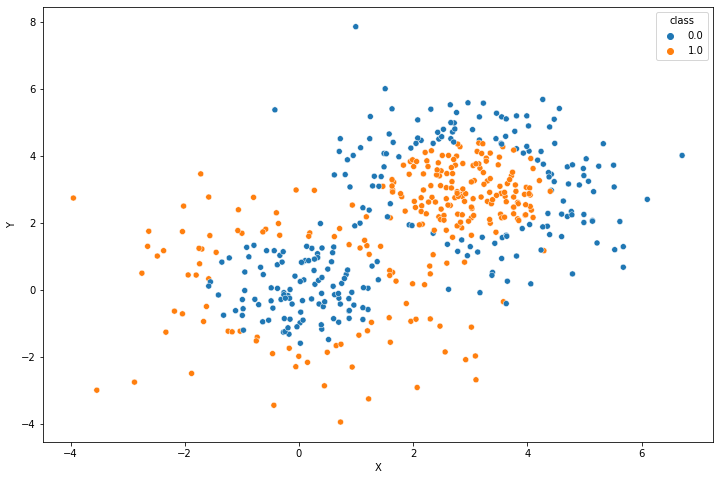

In [6]:
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [7]:
X = circ[['X','Y']]
y = circ['class']

In [8]:
from sklearn.linear_model import LogisticRegression

### Your code is here




In [11]:
log_model = LogisticRegression()
log_model.fit(X,y)

LogisticRegression()

In [12]:
k,b = log_model.coef_[0]

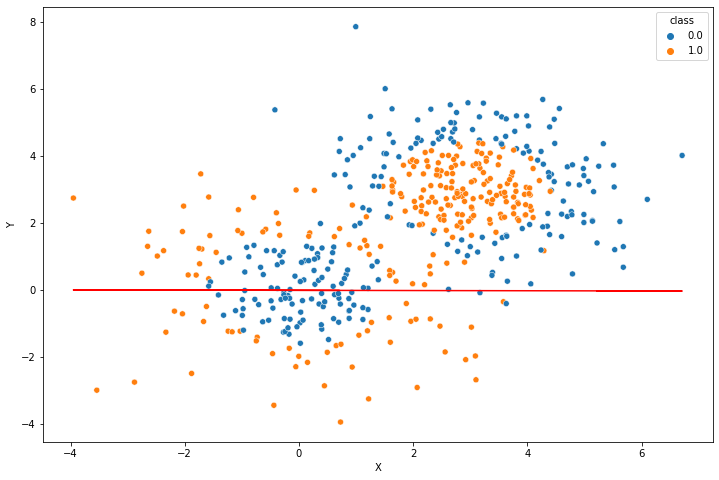

In [13]:
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class'])
plt.plot(circ['X'], circ['X']*k+b, color='red')

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y, log_model.predict(X))

0.424

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [15]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]
# accu_train = {}
# accu_test = {}
all_clfs = []
### Your code is here
for k in all_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    all_clfs.append((f'k={k}',knn))
#     accu_train[k]=accuracy_score(y_train,knn.predict(X_train))
#     accu_test[k]=accuracy_score(y_test,knn.predict(X_test))
# print(accu_train)
# print(accu_test)

**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [17]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
from itertools import product

In [27]:
list(product([0, 1,2], [0, 1]))

[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]

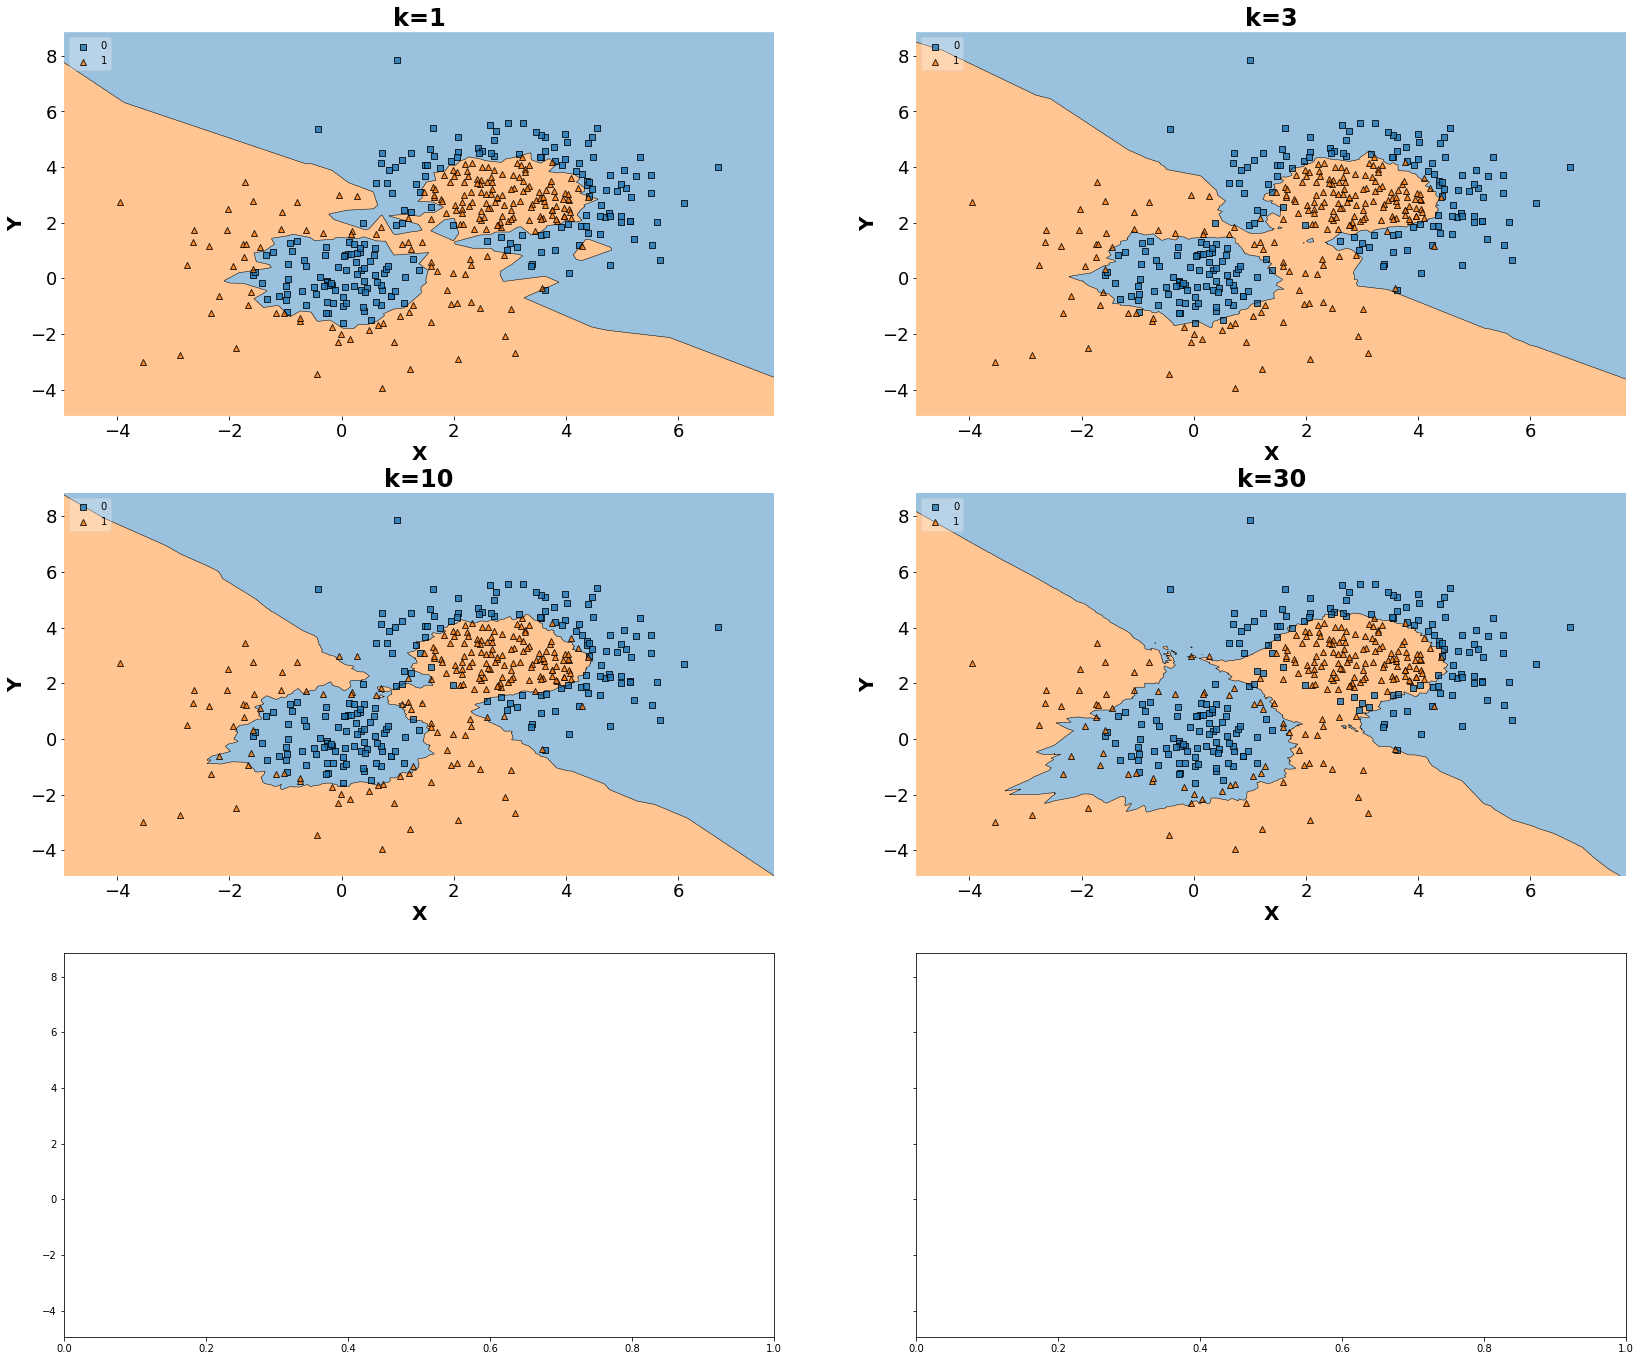

In [31]:
### Your code is here
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(28, 24), sharey=True)

for classifier, grid in zip(
    all_clfs,
    product([0, 1], [0, 1])  # generate [(0, 0), (0, 1), (1, 0), (1, 1)]
):
    clf_name, clf = classifier[0], classifier[1]
    ax = axs[grid[0], grid[1]]

    clf.fit(X_train, y_train)
    
    plot_decision_regions(
        X=X_train, 
        y=y_train, 
        clf=clf, 
        legend=2, 
        ax=ax
    )

    ax.set_title(clf_name, fontsize=24, fontweight="bold")
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_xlabel("X", fontsize=20, fontweight="bold")
    ax.set_ylabel("Y", fontsize=20, fontweight="bold")



1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [32]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [41]:
### Your code is here
X_train_sc = X_train - X_train.mean()
X_test_sc = X_test - X_test.mean()

In [38]:
%time
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
k = [1,5,10]
param_grid = {'n_neighbors':k}
g_s_1 = GridSearchCV(knn,
                    param_grid=param_grid,
                    verbose=2)
g_s_1.fit(X_train, y_train)
y_1 = g_s_1.predict(X_test)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ......................................n_neighbors=1; total time=  11.7s
[CV] END ......................................n_neighbors=1; total time=  11.3s
[CV] END ......................................n_neighbors=1; total time=  11.8s
[CV] END ......................................n_neighbors=1; total time=  11.9s
[CV] END ......................................n_neighbors=1; total time=  13.9s
[CV] END ......................................n_neighbors=5; total time=  11.7s
[CV] END ......................................n_neighbors=5; total time=  14.7s
[CV] END ......................................n_neighbors=5; total time=  12.0s
[CV] END ......................................n_neighbors=5; total time=  11.9s
[CV] END ......................................n_neighbors=5; total time=  11.8s
[CV] END .....................................n_neighbors=10; total time=  12.4s
[CV] END .

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_1)

0.4703603843086621

In [42]:
g_s_1.best_params_

{'n_neighbors': 10}

**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [43]:
### Your code is here
knn = KNeighborsClassifier()
k = [10]
param_grid = {'n_neighbors':k}
g_s_2 = GridSearchCV(knn,
                    param_grid=param_grid,
                    verbose=2)
g_s_2.fit(X_train_sc, y_train)
y_2 = g_s_1.predict(X_test_sc)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .....................................n_neighbors=10; total time=  12.0s
[CV] END .....................................n_neighbors=10; total time=  12.5s
[CV] END .....................................n_neighbors=10; total time=  11.3s
[CV] END .....................................n_neighbors=10; total time=  11.1s
[CV] END .....................................n_neighbors=10; total time=  11.1s


In [44]:
accuracy_score(y_test, y_2)

0.2428132001670907

In [51]:
knn = KNeighborsClassifier(p=1)
k = [10]
param_grid = {'n_neighbors':k}
g_s_2 = GridSearchCV(knn,
                    param_grid=param_grid,
                    verbose=2)
g_s_2.fit(X_train_sc, y_train)
y_2 = g_s_1.predict(X_test_sc)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .....................................n_neighbors=10; total time=  43.0s
[CV] END .....................................n_neighbors=10; total time=  38.9s
[CV] END .....................................n_neighbors=10; total time=  38.5s
[CV] END .....................................n_neighbors=10; total time=  38.4s
[CV] END .....................................n_neighbors=10; total time=  39.0s


In [52]:
accuracy_score(y_test, y_2)

0.2428132001670907

In [50]:
for i in range(5):
    print(i,accuracy_score(y_test, knn_cv['estimator'][i].predict(X_test_sc)))

0 0.5218926821858505
1 0.5218926821858505
2 0.5218926821858505
3 0.5218926821858505
4 0.5218926821858505


**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [53]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


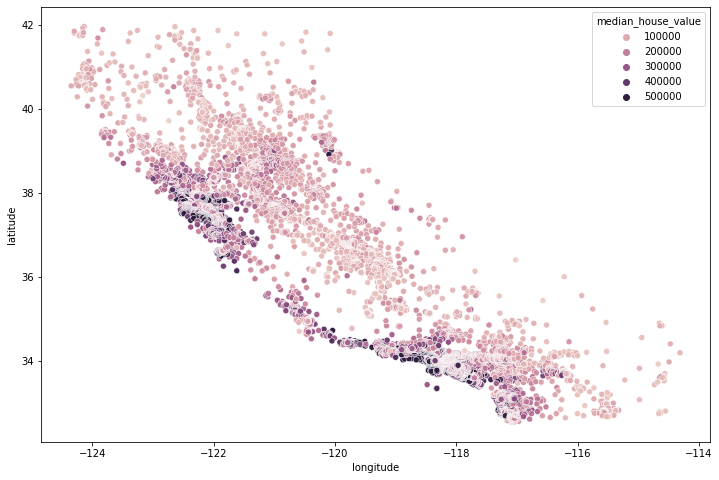

In [54]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot('longitude', 'latitude', data=X, hue=y);

In [68]:
#1
print('Linear Regrassor')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)
print(f'RMSE Train:{(mean_squared_error(y_train,model.predict(X_train)))**(1/2):.3}')
print(f'RMSE Test:{(mean_squared_error(y_test,model.predict(X_test)))**(1/2):.3}')

Linear Regrassor
RMSE Train:1.01e+05
RMSE Test:9.84e+04


In [63]:
X_train = X_train - X_train.mean()
X_test = X_test - X_test.mean()

In [65]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
param_grid = {'n_neighbors': list(range(1,10))}
gs = GridSearchCV(knn,
                 param_grid= param_grid,verbose=2)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             verbose=2)

In [69]:
print('Best params: ', gs.best_params_)
print(f'RMSE Train:{(mean_squared_error(y_train,gs.predict(X_train)))**(1/2):.3}')
print(f'RMSE Test:{(mean_squared_error(y_test,gs.predict(X_test)))**(1/2):.3}')

Best params:  {'n_neighbors': 5}
RMSE Train:4.23e+04
RMSE Test:8.75e+04


In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
param_grid = {}
gs = GridSearchCV(knn,
                 param_grid= param_grid,verbose=2)
gs.fit(X_train, y_train)

In [71]:
X = X - X.mean()

In [75]:
preds_test = {}
preds_train = {}
for h in np.arange(0.02,0.1,0.01):
    def kernal(dist, h=h):
        
        const = 1 / (np.sqrt(2*np.pi))
        power = (-1/2) * ((dist)**2) / h**2
        
        return const * np.exp(power)
    
    knn = KNeighborsRegressor(n_neighbors=5, weights=kernal)
    knn.fit(X_train, y_train)
    
    preds_test[h] = (mean_squared_error(y_test,knn.predict(X_test)))**(1/2)
    preds_train[h] = (mean_squared_error(y_train,knn.predict(X_train)))**(1/2)

In [82]:
for  i in preds_test.keys():
    print((preds_train[i]+preds_test[i])/2)

63640.70691883505
63890.460002135245
64109.828161512996
64265.85583325173
64380.92039865279
64467.080177676806
64532.24646362679
64582.454774776736


In [78]:
preds_train

{0.02: 37688.529952100085,
 0.03: 39369.28868162498,
 0.039999999999999994: 40213.92252985823,
 0.049999999999999996: 40721.74038938412,
 0.06: 41055.56372133847,
 0.06999999999999999: 41284.89541035498,
 0.07999999999999999: 41448.883610142075,
 0.09: 41570.78815688006}